## Recognizing CIFAR-10 images with Deep Learning 

The objective of this project is to utilize Deep Learning techniques to recognize and classify images from the CIFAR-10 dataset. The CIFAR-10 dataset comprises a collection of 60,000 color images, each measuring 32x32 pixels. These images are further categorized into ten distinct classes, representing different objects, animals, and vehicles.

To facilitate our analysis, we will leverage the powerful capabilities of the Keras library. Keras provides a convenient means to import the CIFAR-10 dataset, which is divided into two subsets: a training set containing 50,000 images, and a separate test set consisting of 10,000 images.

Our primary objective is to train a Deep Learning model using the training images to accurately classify and predict the class labels of the test images. By employing various Deep Learning architectures, such as Convolutional Neural Networks (CNNs), we aim to exploit the spatial relationships and features present in the images, enabling the model to effectively discern patterns and identify objects within the CIFAR-10 dataset.

In [1]:
# Importing the necessary libraries and modules
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
% matplotlib inline

Using TensorFlow backend.


In [2]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 18s 0us/step


In [3]:
# Set the batch size for training
BATCH_SIZE = 128  # Number of samples per gradient update during training

# Set the number of training epochs
nb_epochs = 20  # Number of training epochs

# Set the validation split ratio
VALIDATION_SPLIT = 0.2  # Proportion of the training data to be used as validation data

# Set the number of classes in the dataset
num_classes = 10  # Number of classes in the dataset

In [4]:
# Retrieve the shape information of the training data
num_train, img_channels, img_rows, img_cols = X_train.shape

# Retrieve the shape information of the test data
num_test, _, _, _ = X_test.shape

In [5]:
# Print the shape of X_train
print('X_train Shape:', X_train.shape)

# Retrieve the number of training samples
training_samples = X_train.shape[0]
print("Training samples:", training_samples)

# Retrieve the number of test samples
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [6]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

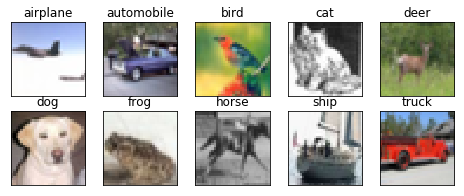

In [7]:
# Create a figure for plotting images
fig = plt.figure(figsize=(8, 3))

# Iterate over each class
for i in range(num_classes):
    # Add a subplot for each class
    axis = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    
    # Retrieve the indices of samples belonging to the current class
    idx = np.where(y_train[:] == i)[0]
    
    # Get a random image from the samples of the current class
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num, ::]
    
    # Set the title of the subplot as the class name
    axis.set_title(class_names[i])
    
    # Display the image
    plt.imshow(image)

# Show the plot
plt.show()

In [8]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [9]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
from keras import backend as K

# Check the backend and set image dimension ordering
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering('tf')

## Building sequential model

In [11]:
# Create a sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a kernel size of (3, 3), and 'same' padding
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))

# Add a ReLU activation layer
model.add(Activation('relu'))

# Add a 2D max pooling layer with a pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

In [12]:
# Add a flatten layer
model.add(Flatten())

# Add a dense layer with 512 units
model.add(Dense(512))

# Add a ReLU activation layer
model.add(Activation('relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with num_classes units
model.add(Dense(num_classes))

# Add a softmax activation layer
model.add(Activation('softmax'))

# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

## Compiling the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Training the model

In [14]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, 
          validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 30s 744us/step - loss: 1.7436 - acc: 0.3870 - val_loss: 1.4285 - val_acc: 0.5030
Epoch 2/20
40000/40000 [==============================] - 5s 136us/step - loss: 1.3724 - acc: 0.5136 - val_loss: 1.2388 - val_acc: 0.5726
Epoch 3/20
40000/40000 [==============================] - 5s 137us/step - loss: 1.2401 - acc: 0.5625 - val_loss: 1.2981 - val_acc: 0.5421
Epoch 4/20
40000/40000 [==============================] - 5s 136us/step - loss: 1.1557 - acc: 0.5938 - val_loss: 1.1023 - val_acc: 0.6181
Epoch 5/20
40000/40000 [==============================] - 5s 134us/step - loss: 1.0808 - acc: 0.6198 - val_loss: 1.0849 - val_acc: 0.6220
Epoch 6/20
40000/40000 [==============================] - 5s 135us/step - loss: 1.0220 - acc: 0.6436 - val_loss: 1.0930 - val_acc: 0.6225
Epoch 7/20
40000/40000 [==============================] - 5s 136us/step - loss: 0.9739 - acc: 0.6599 - val_loss: 1.0344 -

## List all data in history

In [15]:
print(model_history.history.keys())

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


## Summarize history for accuracy

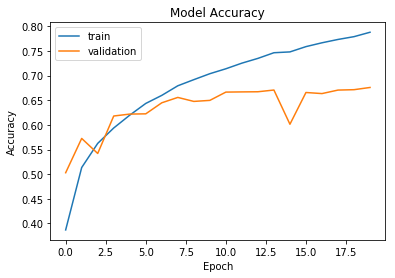

In [16]:
# Plot the training and validation accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Summarize history for loss

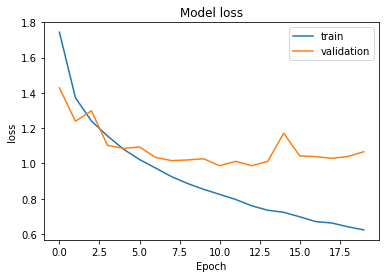

In [17]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()# Plot the training and validation loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
# Evaluate the model on the test dataset
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

10000/10000 [==============================] - 1s 51us/step


In [19]:
# Print the test score and accuracy
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score 1.07640028095
Test accuracy 0.671
